### 한국어 분석을 위한 환경 구성
[vs 2015 설치]
- 제공한 설치 파일을 실행하고 사용자 지정을 선택하여 프로그래밍언어에 있는 visual c++을 추가하여 설치<br>

[jdk설치]
- 제공한 파일 설치, 설치시 그냥 기본으로 설치
- jdk 환경변수 설정
- 새로만들기를 눌러 다음과 같이 작성한다
- JAVAHOME
- C:\Program Files\Java\jdk1.8.0_281
- 주피터 종료후 재실행

[필요라이브러리 설치]
- pip install konlpy==0.5.1
- pip install jpype1
- pip install jpype1-py3



### 워드 클라우드를 사용하기 위한 설정

- pip install pytagcloud
- pip install pygame
- pip install simplejson

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

In [2]:
from konlpy.tag import Okt
from collections import Counter
import pytagcloud
from IPython.display import Image
import re

pygame 2.0.1 (SDL 2.0.14, Python 3.7.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
df = pd.read_csv('wiki.csv')
df

,title,content
0,코르키,리그 오브 레전드 챔피언 목록 주 역할군 내 가나다순 정렬 [ 암살자 ] ...
1,Ichika Nito,Ichika Nito 이름いちか にと (이치카 니토)출생1994년 7월 7일 (26...
2,마흐디 운동,1. 개요2. 배경3. 진행19세기 이집트의 케디브 왕조와 영국의 이중 지배를 받던...
3,슈퍼콘,은(는) 여기로 연결됩니다. 현대카드 슈퍼콘서트에 대한 내용은 현대카드/문화사업 문...
4,김동현,은(는) 여기로 연결됩니다. 1981년생 종합격투기 선수 겸 예능인 김동현에 대한 ...
...,...,...
91,괴수고질라,썰레임 님을존경하는분이다팬아트를 계속그릴거라고 한다[1]이유튜버를욕하지마세요...h...
92,이해진,[ 펼치기 · 접기 ]주요 계열사네이버 | A홀딩스 (Z홀딩스 · LINE · 야후...
93,로스크바(슈퍼스트링),이 문서에 스포일러가 포함되어 있습니다.이 문서가 설명하는 작품이나 인물 등에 대한...
94,2019년,로그인 후 편집 가능한 문서입니다.해2016년2017년2018년2019년2020년2...


In [4]:
# 텍스트 정제 함수 : 한글 이외의 문자는 전부 제거한다
def text_cleaning(text):
    # 한글 정규식 정의( 띄어쓰기 ㄱ~ㅣ 가~힣 )
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    # 정제한다
    result = hangul.sub('',text)
    return result

In [5]:
# 테스트
print(df['content'][0])
print('------------------'*10)
print(text_cleaning(df['content'][0]))

리그 오브 레전드 챔피언 목록  주 역할군 내 가나다순 정렬   [  암살자  ]    암살자  녹턴  니달리  렝가  르블랑  마스터​ 이  비에고  샤코  아칼리  에코  요네  이블린  제드  카사딘  카직스  카타​리나  키아나  탈론  피즈   [  전사  ]    전사  가렌  갱플랭크  그라​가스  나르  나서스  다리​우스  다이​애나  럼블  레넥톤  렉사이  리 신  리븐  릴리아  모데​카이저  문도​ 박사  바이  볼리​베어  세트  쉬바나  스카너  신 짜오  아트​록스  야스오  오공  올라프  요릭  우디르  우르곳  워윅  이렐​리아  일라​오이  잭스  제이스  카밀  케인  케일  클레드  트런들  트린​다미어  판테온  피오라  헤카림   [  원거리  ]    원거리  그레​이브즈  드레​이븐  루시안  미스​ 포츈  바루스  베인  사미라  세나  시비르  아펠​리오스  애쉬  이즈​리얼  자야  진  징크스  카이사  칼리​스타  케이​틀린  코그모  코르키  퀸  킨드​레드  트리​스타나  트위치  티모   [  마법사  ]    마법사  니코  라이즈  럭스  리산​드라  말자하  모르가나  베이가  벨코즈  브랜드  블라디​미르  빅토르  사일​러스  세라핀  스웨인  신드라  아리  아우렐​리온 솔  아지르  애니  애니​비아  엘리스  오리​아나  자이라  제라스  조이  직스  카르마  카서스  카시​오페아  케넨  탈리야  트위스티드 페이트  피들​스틱  하이머​딩거   [  탱커  ]    탱커  갈리오  노틸​러스  누누와​ 윌럼프  람머스  레오나  렐  마오​카이  말파​이트  블리츠​크랭크  뽀삐  사이온  세주​아니  쉔  신지드  아무무  알리​스타  오른  자르반​ 4세  자크  초가스   [  서포터  ]    서포터  나미  라칸  룰루  바드  브라움  소나  소라카  쓰레쉬  아이번  유미  잔나  질리언  타릭  탐 켄치  파이크  암살자  녹턴  니달리  렝가  르블랑  마스터​ 이 

In [6]:
# 결측치 확인 
df.isna().sum()
df.dropna(inplace = True)
df.isna().sum()

title      0
content    0
dtype: int64

In [7]:
# 모든 특성에 적용한다
df['title'] = df['title'].apply(lambda x:text_cleaning(x))
df['content'] = df['content'].apply(lambda x:text_cleaning(x))

In [8]:
df

,title,content
0,코르키,리그 오브 레전드 챔피언 목록 주 역할군 내 가나다순 정렬 암살자 암살자 ...
1,,이름 이치카 니토출생년 월 일 세국적일본 유튜브 개설년 월 일구독자만명조회수약...
2,마흐디 운동,개요 배경 진행세기 이집트의 케디브 왕조와 영국의 이중 지배를 받던 수단에서 이슬...
3,슈퍼콘,은는 여기로 연결됩니다 현대카드 슈퍼콘서트에 대한 내용은 현대카드문화사업 문서를의 ...
4,김동현,은는 여기로 연결됩니다 년생 종합격투기 선수 겸 예능인 김동현에 대한 문서입니다 다...
...,...,...
91,괴수고질라,썰레임 님을존경하는분이다팬아트를 계속그릴거라고 한다이유튜버를욕하지마세요 채널링크
92,이해진,펼치기 접기 주요 계열사네이버 홀딩스 홀딩스 야후 재팬 네이버랩스 네...
93,로스크바슈퍼스트링,이 문서에 스포일러가 포함되어 있습니다이 문서가 설명하는 작품이나 인물 등에 대한 ...
94,년,로그인 후 편집 가능한 문서입니다해년년년년년년년연대년대년대년대년대년대세기세기세기세기...


In [9]:
# 말뭉치 생성(각 컬럼의 문자열들을 하나로 합처준다)
title_corpus = ''.join(df['title'].tolist())
content_corpus = ''.join(df['content'].tolist())
print(title_corpus)

코르키 마흐디 운동슈퍼콘김동현삼각함수의 노래이은택카트라이더 프로게이머기동전사 건담  노진구스타크래프트  공허의 유산협동전 임무돌연변이원불꽃놀이강성형년 로스트아크 이주 대란아이유브 왕조판사백승호클럽 경력타무라 호노간레이더 뉴 데이스매시브라더스 시리즈네이버기업 하이픽셀 베이블레이드 버스트파츠인천 전자랜드 엘리펀츠시즌백종원의 요리비책바나나맛 쿠키통수권유재석어록복잡유체서브 콤플렉스등장인물명군이 되어보세등장인물부김동현반란 연합유재석어록톰과 제리서리풀터널검은 마법사보스 몬스터수단 공화국역사다크 프린스기동전사 건담  진흙주먹복잡유체인천 전자랜드 엘리펀츠시즌메르센 소수군단저먼 셰퍼드 줌버스파일탄창 노진구아이유음반 목록잼미님로트와일러더 허트 비즈니스년 로스트아크 이주 대란괴수고질라유정호사건사고후지 스피드웨이시간의 숲    양비론간레이 퓨처스 파크도라에몽도라에몽이은택카트라이더 프로게이머토리코만화에펨코리아비판노진구틀수원 현대건설 힐스테이트선수단쇼커 라이더유구장창    주차카카오버터오오토모 쿄코시가담배  반월동화성노돌리브랜든 나이트야구년 미얀마 민주화 운동지디펜드코피 킹스턴괴수고질라이해진로스크바슈퍼스트링년뱅드림 걸즈 밴드 파티뽑기


In [10]:
# 형태소 분석
tagger = Okt()
title_nouns = tagger.nouns(title_corpus)
content_nouns = tagger.nouns(content_corpus)

In [11]:
content_nouns

['리그',
 '오브',
 '레전드',
 '챔피언',
 '목록',
 '주',
 '역할',
 '내',
 '가나다순',
 '정렬',
 '암살자',
 '암살자',
 '녹턴',
 '니달리',
 '렝가',
 '르블랑',
 '마스터',
 '이',
 '비',
 '에고',
 '샤코',
 '아칼리',
 '에코',
 '요',
 '이블린',
 '제드',
 '카사딘',
 '카직스',
 '카타리나',
 '키',
 '나',
 '탈론',
 '피즈',
 '전사',
 '전사',
 '가렌',
 '갱플랭크',
 '그라가스',
 '나서스',
 '다리우스',
 '다이애나',
 '럼블',
 '레넥톤',
 '렉',
 '사이',
 '리',
 '신',
 '리븐',
 '릴리',
 '모데카이저',
 '문도',
 '박사',
 '바이',
 '볼리베어',
 '세트',
 '쉬바나',
 '스카너',
 '신',
 '짜오',
 '아트록스',
 '야스오',
 '오공',
 '올라프',
 '요릭',
 '우디르',
 '우르곳',
 '워윅',
 '이렐리아',
 '라오',
 '잭스',
 '제이스',
 '카밀',
 '케인',
 '케일',
 '레드',
 '트런들',
 '트린다미어',
 '판테온',
 '피오라',
 '헤카림',
 '원거리',
 '원거리',
 '그레이브즈',
 '드레이븐',
 '루시안',
 '미스',
 '포츈',
 '바루스',
 '베인',
 '사미',
 '세',
 '시비르',
 '아펠',
 '리오스',
 '애쉬',
 '이즈리얼',
 '진',
 '징크스',
 '카이',
 '사',
 '칼리',
 '스타',
 '케이틀린',
 '코그모',
 '코르키',
 '퀸',
 '킨',
 '드레드',
 '트리스타나',
 '트위치',
 '티모',
 '마법사',
 '마법사',
 '니코',
 '라이즈',
 '럭스',
 '리산드라',
 '말자하',
 '모르가나',
 '베이가',
 '벨코즈',
 '브랜드',
 '블라디미르',
 '빅토르',
 '사일러',
 '스',
 '라핀',
 '스웨인',
 '신드라',
 '아리',
 '아우',
 '렐리온',
 '솔

In [12]:
# 각단어의 빈도수를 구한다
title_count = Counter(title_nouns)
content_count = Counter(content_nouns)
print(title_count)
# print(content_count)

Counter({'노진구': 3, '운동': 2, '김동현': 2, '이은택': 2, '카트라이더': 2, '프로게이머': 2, '기동': 2, '전사': 2, '건담': 2, '년': 2, '로스트': 2, '아크': 2, '이주': 2, '대란': 2, '아이유': 2, '버스': 2, '인천': 2, '전자랜드': 2, '엘리': 2, '펀츠': 2, '시즌': 2, '유재석': 2, '어록': 2, '복잡': 2, '유체': 2, '등장인물': 2, '괴수': 2, '고질라': 2, '도라에몽': 2, '코르키': 1, '마흐디': 1, '슈퍼': 1, '콘': 1, '삼각함수': 1, '노래': 1, '스타크래프트': 1, '공허': 1, '유산': 1, '협동': 1, '전': 1, '임무': 1, '돌연변이원': 1, '불꽃놀이': 1, '강성형': 1, '브': 1, '왕조': 1, '판사': 1, '백승호': 1, '클럽': 1, '경력': 1, '타무라': 1, '호노': 1, '레이더': 1, '뉴': 1, '데이': 1, '스매시': 1, '브라더스': 1, '시리즈': 1, '네이버': 1, '기업': 1, '하이': 1, '픽셀': 1, '베이': 1, '블레이드': 1, '트': 1, '파츠': 1, '백종원': 1, '요리': 1, '비책': 1, '바나나': 1, '맛': 1, '쿠키': 1, '통': 1, '수권': 1, '서브': 1, '콤플렉스': 1, '군': 1, '부': 1, '반란': 1, '연합': 1, '톰': 1, '제리': 1, '서리': 1, '풀': 1, '터널': 1, '마법사': 1, '보스': 1, '몬스터': 1, '수단': 1, '공화국': 1, '역사': 1, '다크': 1, '프린스': 1, '진흙': 1, '주먹': 1, '메르': 1, '소수': 1, '군단': 1, '저먼': 1, '셰퍼드': 1, '줌': 1, '파일': 1, '탄창': 1, '음반': 1, '목록': 1, '잼미': 1

### 키워드 다듬기

In [13]:
# 워드 클라우드는 두 글자 이상만 가능하므로 한글자는 제거한다
# 삭제전
print(len(title_count))
print(len(content_count))

title_dict = {}
for key in title_count:
    # 글자길이가 1보다 크다면 딕셔너리에 담아준다
    if len(key)>1:
        title_dict[key] = title_count[key]
        
content_dict = {}
for key in content_count:
    if len(key)>1:
        content_dict[key] = content_count[key]
# 삭제후
print(len(title_dict))
print(len(content_dict))

remove_title_count = Counter(title_dict)
remove_content_count = Counter(content_dict)


166
22456
146
21579


In [14]:
# 불용어제거
# 불용어사전 불러오기
with open('data10/korean_stopwords.txt',encoding = 'utf-8') as fp:
    stopwords = fp.readlines()

# \n제거
stopwords = [x.strip() for x in stopwords]
stopwords

['아',
 '휴',
 '아이구',
 '아이쿠',
 '아이고',
 '어',
 '나',
 '우리',
 '저희',
 '따라',
 '의해',
 '을',
 '를',
 '에',
 '의',
 '가',
 '으로',
 '로',
 '에게',
 '뿐이다',
 '의거하여',
 '근거하여',
 '입각하여',
 '기준으로',
 '예하면',
 '예를 들면',
 '예를 들자면',
 '저',
 '소인',
 '소생',
 '저희',
 '지말고',
 '하지마',
 '하지마라',
 '다른',
 '물론',
 '또한',
 '그리고',
 '비길수 없다',
 '해서는 안된다',
 '뿐만 아니라',
 '만이 아니다',
 '만은 아니다',
 '막론하고',
 '관계없이',
 '그치지 않다',
 '그러나',
 '그런데',
 '하지만',
 '든간에',
 '논하지 않다',
 '따지지 않다',
 '설사',
 '비록',
 '더라도',
 '아니면',
 '만 못하다',
 '하는 편이 낫다',
 '불문하고',
 '향하여',
 '향해서',
 '향하다',
 '쪽으로',
 '틈타',
 '이용하여',
 '타다',
 '오르다',
 '제외하고',
 '이 외에',
 '이 밖에',
 '하여야',
 '비로소',
 '한다면 몰라도',
 '외에도',
 '이곳',
 '여기',
 '부터',
 '기점으로',
 '따라서',
 '할 생각이다',
 '하려고하다',
 '이리하여',
 '그리하여',
 '그렇게 함으로써',
 '하지만',
 '일때',
 '할때',
 '앞에서',
 '중에서',
 '보는데서',
 '으로써',
 '로써',
 '까지',
 '해야한다',
 '일것이다',
 '반드시',
 '할줄알다',
 '할수있다',
 '할수있어',
 '임에 틀림없다',
 '한다면',
 '등',
 '등등',
 '제',
 '겨우',
 '단지',
 '다만',
 '할뿐',
 '딩동',
 '댕그',
 '대해서',
 '대하여',
 '대하면',
 '훨씬',
 '얼마나',
 '얼마만큼',
 '얼마큼',
 '남짓',
 '여',
 '얼마간',
 '약간',
 '다소',
 '좀',
 '조

In [15]:
# 불용어를 제외한 나머지를 새롭게 담아준다
print(len(remove_title_count))
print(len(remove_content_count))

content_dict = {}
for key in remove_content_count:
    # 현재 글자가 불용어에 포함되어있지 않다면
    if key not in stopwords:
        content_dict[key] = remove_content_count[key]
title_dict = {}
for key in remove_title_count:
    # 현재 글자가 불용어에 포함되어있지 않다면
    if key not in stopwords:
        title_dict[key] = remove_title_count[key]

remove_content_count = Counter(content_dict)
remove_title_count = Counter(title_dict)
print(len(remove_content_count))
print(len(remove_title_count))

146
21579
21468
145


In [16]:
remove_title_count

Counter({'코르키': 1,
         '마흐디': 1,
         '운동': 2,
         '슈퍼': 1,
         '김동현': 2,
         '삼각함수': 1,
         '노래': 1,
         '이은택': 2,
         '카트라이더': 2,
         '프로게이머': 2,
         '기동': 2,
         '전사': 2,
         '건담': 2,
         '노진구': 3,
         '스타크래프트': 1,
         '공허': 1,
         '유산': 1,
         '협동': 1,
         '임무': 1,
         '돌연변이원': 1,
         '불꽃놀이': 1,
         '강성형': 1,
         '로스트': 2,
         '아크': 2,
         '이주': 2,
         '대란': 2,
         '아이유': 2,
         '왕조': 1,
         '판사': 1,
         '백승호': 1,
         '클럽': 1,
         '경력': 1,
         '타무라': 1,
         '호노': 1,
         '레이더': 1,
         '데이': 1,
         '스매시': 1,
         '브라더스': 1,
         '시리즈': 1,
         '네이버': 1,
         '기업': 1,
         '하이': 1,
         '픽셀': 1,
         '베이': 1,
         '블레이드': 1,
         '버스': 2,
         '파츠': 1,
         '인천': 2,
         '전자랜드': 2,
         '엘리': 2,
         '펀츠': 2,
         '시즌': 2,
         '백종원': 1,
        

### 워드클라우드 시각화
- 한글 폰트 설치
- https://hangeul.naver.com/webfont/NanumGothic/NanumGothic.ttf
- 내려받은 폰트를 해당경로에 넣어준다
- C:\{Users}\{master11}\anaconda3\Lib\site-packages\pytagcloud\fonts
- C:\Users\master11\anaconda3\Lib\site-packages\pytagcloud\fonts
- fonts.json에다가 아래꺼 붙여넣기
- {
        "name" : "NanumGothic",
        "ttf" : "NanumGothic.ttf",
        "web" : "http://fonts.googleapis.com/css?family=Nanum+Gothic"
  }

In [17]:
# 워드 클라우드를 위한 단어사전을 생성한다
# title에서 가장 많이 나온단어 40개를 추출한다
ranked_title_tags = remove_title_count.most_common(40)
title_tag_list = pytagcloud.make_tags(ranked_title_tags)
# 워드 클라우드 이미지를 생성한다
pytagcloud.create_tag_image(title_tag_list,'title_word.jpg',size = (900,600),
                            fontname = 'NanumGothic',rectangular=False)

In [18]:
# 워드 클라우드를 위한 단어사전을 생성한다
# content에서 가장 많이 나온단어 40개를 추출한다
ranked_content_tags = remove_content_count.most_common(40)
content_tag_list = pytagcloud.make_tags(ranked_content_tags)
# 워드 클라우드 이미지생성
pytagcloud.create_tag_image(content_tag_list,'content_word.jpg',size = (900,600),
                            fontname = 'NanumGothic',rectangular=False)

title


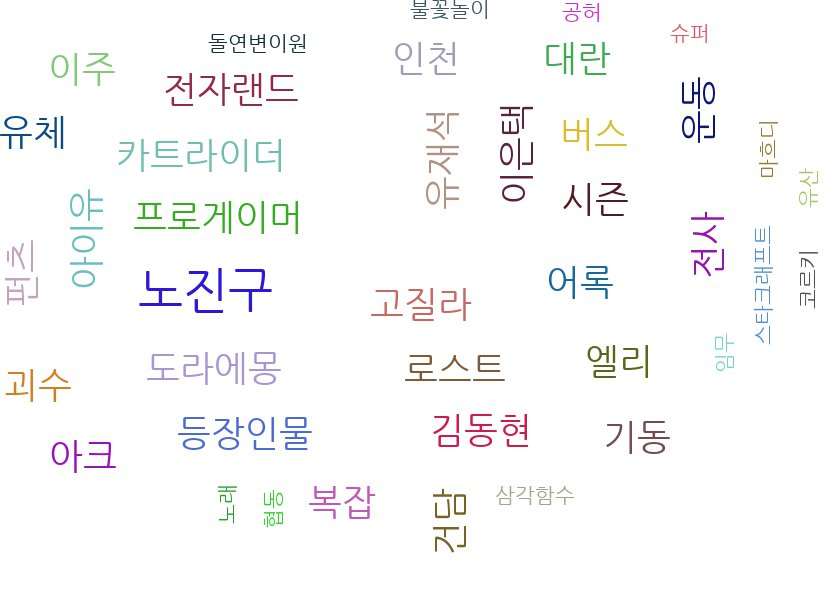

In [20]:
print('title')
Image(filename='title_word.jpg')

content


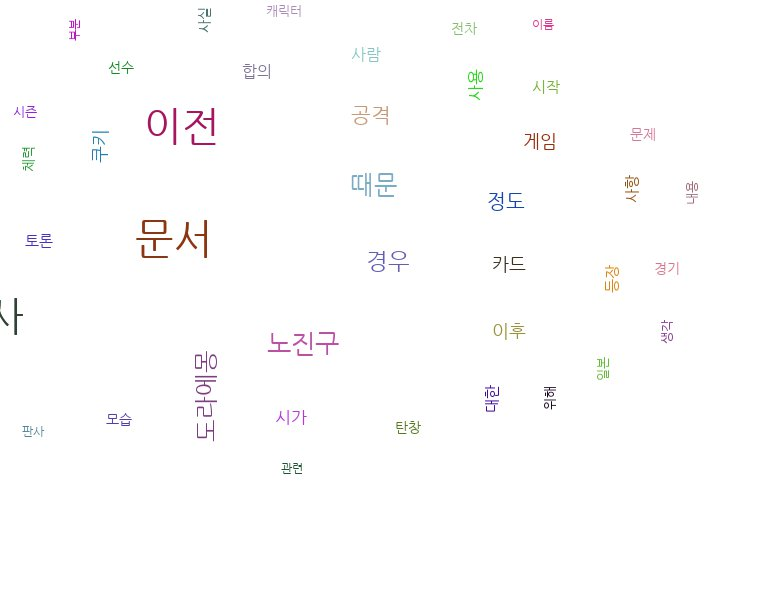

In [21]:
print('content')
Image(filename='content_word.jpg')

In [ ]:
KQ0oUAktmnsJ8UETjZWc
h175EGHWg3